In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
df = pd.read_csv("Autoencoder 2017 Dataset.csv")
df = df.fillna(0)

In [3]:
df.head(5)

,Fraud,0191T,0474T,10060,11000,11100,11440,11441,11642,11900,...,J3490,J3590,J7312,J7313,J7611,J7999,J9035,J9190,J9280,Q2037
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Fraud distribution
df['Fraud'].value_counts()

0.0    1936
1.0      21
Name: Fraud, dtype: int64

In [13]:
#Fraud % in dataset
df['Fraud'].value_counts()[1]/(df['Fraud'].value_counts()[0]+df['Fraud'].value_counts()[1])*100

1.0730710270822688

In [14]:
#Consider 1000 non frauds doctor by random sampling
non_fraud = df[df['Fraud'] == 0].sample(1000)
fraud = df[df['Fraud'] == 1]
df2 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df2.drop(['Fraud'], axis = 1).values
Y = df2["Fraud"].values

In [195]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

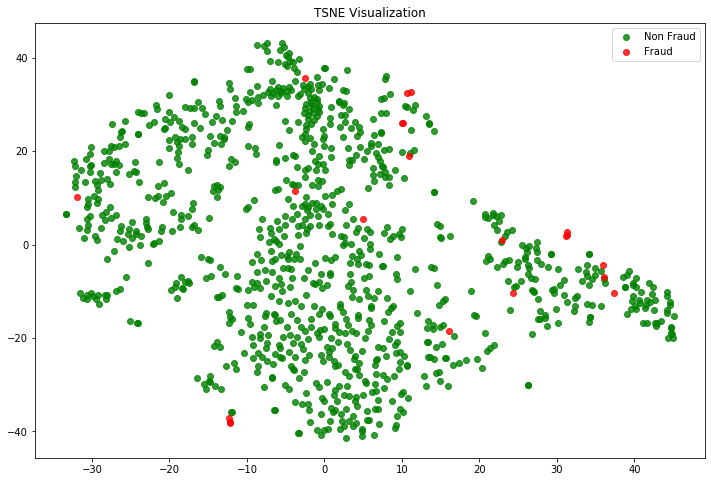

In [19]:
#Visualize the nature of fraud and non-fraud transactions using T-SNE
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.title("TSNE Visualization")
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [20]:
shape=(X.shape[1],)
shape

(367,)

In [23]:
# Autoencoder
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(30, activation='relu')(encoded)

## decoding part
decoded = Dense(30, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [50]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=keras.optimizers.SGD(lr=0.001), loss="binary_crossentropy")

In [51]:
#Min max scaling
x = df.drop(["Fraud"], axis=1)
y = df["Fraud"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [52]:
autoencoder.fit(x_norm[0:1936], x_norm[0:1936], 
                epochs = 20, 
                shuffle = True, validation_split = 0.20);

Train on 1548 samples, validate on 388 samples
Epoch 1/20
1548/1548 [==============================] - 1s 476us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 2/20
1548/1548 [==============================] - 0s 157us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 3/20
1548/1548 [==============================] - 0s 149us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 4/20
1548/1548 [==============================] - 0s 114us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 5/20
1548/1548 [==============================] - 0s 112us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 6/20
1548/1548 [==============================] - 0s 115us/sample - loss: 0.5839 - accuracy: 0.9367 - val_loss: 0.5849 - val_accuracy: 0.9345
Epoch 7/20
1548/1548 [==============================] - 0s 110us/

In [53]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [54]:
norm_hid_rep = hidden_representation.predict(x_norm[:1936])
fraud_hid_rep = hidden_representation.predict(x_fraud)

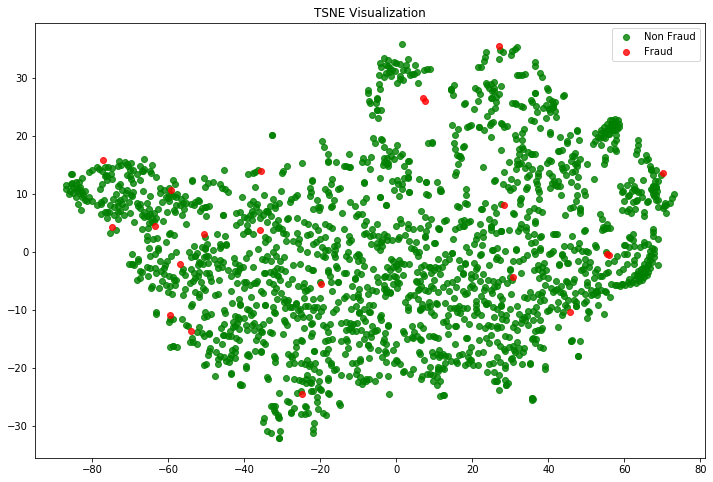

In [55]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

# Second Method

In [4]:
#Normalized and scale
df_norm = df.copy()
df_norm.iloc[:,1:] = StandardScaler().fit_transform(df_norm.iloc[:,1:])

In [5]:
#Split test and train sets
train_x, test_x = train_test_split(df_norm, test_size=0.4, random_state=100)
train_x = train_x[train_x.Fraud == 0]       # extract normal transactions, as we only train NN on non-fraud cases
train_x = train_x.drop(['Fraud'], axis=1)   # drop the fraud column

test_y = test_x['Fraud']                    # save the fraud column for the test set
test_x = test_x.drop(['Fraud'], axis=1)     # drop the fraud column

train_x = train_x.values                    # transform df to ndarray
test_x = test_x.values                      # transform df to ndarray

In [41]:
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 367 different CPT codes
encoding_dim = 100
hidden_dim1 = 50 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 10
learning_rate = 1e-7

In [42]:
# This returns a tensor
input_layer = Input(shape=(input_dim, ))

# a layer instance is callable on a tensor, and returns a tensor
# Dense implements the operation: output = activation(dot(input, kernel) + bias), where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# activity_regularizer: Regularizer function applied to the output of the layer
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="relu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# This creates a model that includes
# the Input layer and four Dense layers
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [43]:
# Configure the learning process, by compiling the model
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')

# Saving the model
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                     save_best_only=True,
                     verbose=0)

# TensorBoard basic visualizations.
# This callback writes a log for TensorBoard, 
# which allows you to visualize dynamic graphs of your training and test metrics
tb = TensorBoard(log_dir='./logs',
                 histogram_freq=0,
                 write_graph=True,
                 write_images=True)

# Starts training
# autoencoder: same training(x) and target data(y)
# validation_data: tuple (x_val, y_val) on which 
# to evaluate the loss and any model metrics at the end of each epoch.

# History.history attribute is a record of training loss values 
# and metrics values at successive epochs.
history = autoencoder.fit(x=train_x, y=train_x,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(test_x, test_x),
                          verbose=1,
                          callbacks=[cp, tb]).history

Train on 1160 samples, validate on 783 samples
Epoch 1/100
1160/1160 [==============================] - 1s 565us/sample - loss: 1.1406 - accuracy: 0.0034 - val_loss: 1.0428 - val_accuracy: 0.0038
Epoch 2/100
1160/1160 [==============================] - 0s 124us/sample - loss: 1.0981 - accuracy: 0.0034 - val_loss: 0.9848 - val_accuracy: 0.0000e+00
Epoch 3/100
1160/1160 [==============================] - 0s 177us/sample - loss: 1.0317 - accuracy: 8.6207e-04 - val_loss: 0.9187 - val_accuracy: 0.0000e+00
Epoch 4/100
1160/1160 [==============================] - 0s 102us/sample - loss: 0.9683 - accuracy: 0.0000e+00 - val_loss: 0.8672 - val_accuracy: 0.0000e+00
Epoch 5/100
1160/1160 [==============================] - 0s 300us/sample - loss: 0.9262 - accuracy: 0.0000e+00 - val_loss: 0.8391 - val_accuracy: 0.0000e+00
Epoch 6/100
1160/1160 [==============================] - 0s 132us/sample - loss: 0.9053 - accuracy: 8.6207e-04 - val_loss: 0.8269 - val_accuracy: 0.0000e+00
Epoch 7/100
1160/1160 [

1160/1160 [==============================] - 0s 99us/sample - loss: 0.8527 - accuracy: 0.0190 - val_loss: 0.8026 - val_accuracy: 0.0166
Epoch 56/100
1160/1160 [==============================] - 0s 112us/sample - loss: 0.8522 - accuracy: 0.0190 - val_loss: 0.8022 - val_accuracy: 0.0166
Epoch 57/100
1160/1160 [==============================] - 0s 120us/sample - loss: 0.8517 - accuracy: 0.0190 - val_loss: 0.8018 - val_accuracy: 0.0166
Epoch 58/100
1160/1160 [==============================] - 0s 75us/sample - loss: 0.8514 - accuracy: 0.0207 - val_loss: 0.8021 - val_accuracy: 0.0179
Epoch 59/100
1160/1160 [==============================] - 0s 132us/sample - loss: 0.8509 - accuracy: 0.0198 - val_loss: 0.8015 - val_accuracy: 0.0179
Epoch 60/100
1160/1160 [==============================] - 0s 119us/sample - loss: 0.8505 - accuracy: 0.0207 - val_loss: 0.8015 - val_accuracy: 0.0179
Epoch 61/100
1160/1160 [==============================] - 0s 94us/sample - loss: 0.8501 - accuracy: 0.0216 - val_lo

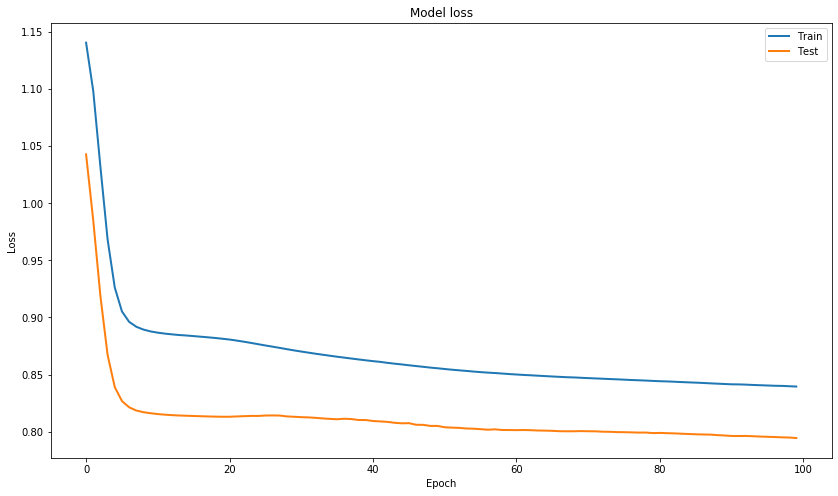

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [45]:
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

,Reconstruction_error,True_class
count,783.000000,783.000000
mean,0.794484,0.008940
std,2.507835,0.094188
min,0.009835,0.000000
25%,0.018211,0.000000
50%,0.044637,0.000000
75%,0.272786,0.000000
max,35.042500,1.000000


In [46]:
#Check reconstruction errors
error_df.sort_values(['Reconstruction_error', 'True_class'], ascending=[0, 1])

,Reconstruction_error,True_class
1949,35.042500,1.0
1092,23.013645,0.0
1778,19.107423,0.0
1598,17.549635,0.0
223,16.772223,0.0
702,16.626164,0.0
1662,12.959105,0.0
1415,11.658305,0.0
1508,10.981613,0.0
1017,10.929556,1.0


In [14]:
test_y

1135    0.0
75      0.0
264     0.0
565     0.0
805     0.0
808     0.0
354     0.0
1296    0.0
538     0.0
983     0.0
1133    0.0
492     0.0
1318    0.0
647     0.0
355     0.0
837     0.0
832     0.0
23      0.0
1941    0.0
1641    0.0
336     0.0
1250    0.0
1908    0.0
1856    0.0
913     0.0
903     0.0
27      0.0
1056    0.0
408     0.0
1808    0.0
       ... 
90      0.0
1790    0.0
308     0.0
221     0.0
1917    0.0
964     0.0
747     0.0
1540    0.0
66      0.0
886     0.0
1504    0.0
857     0.0
636     0.0
919     0.0
1697    0.0
713     0.0
1171    0.0
1659    0.0
1580    0.0
1694    0.0
984     0.0
1344    0.0
1325    0.0
1240    0.0
69      0.0
431     0.0
916     0.0
229     0.0
1272    0.0
1391    0.0
Name: Fraud, Length: 783, dtype: float64

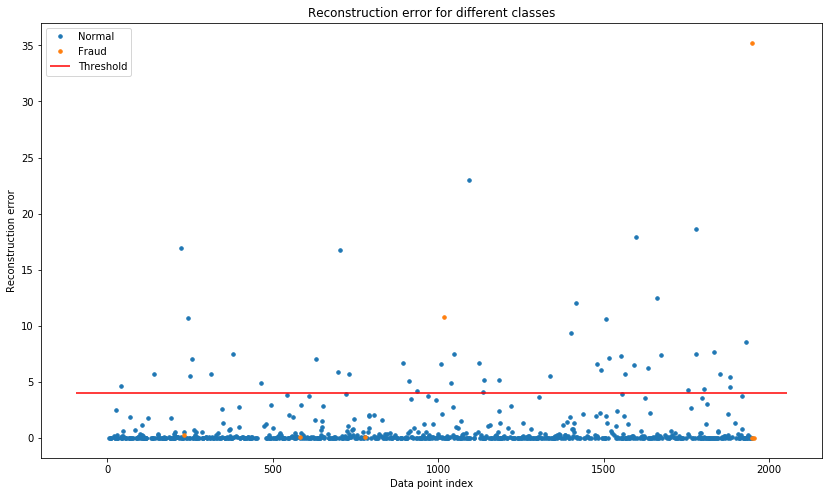

In [12]:
threshold_fixed = 4
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

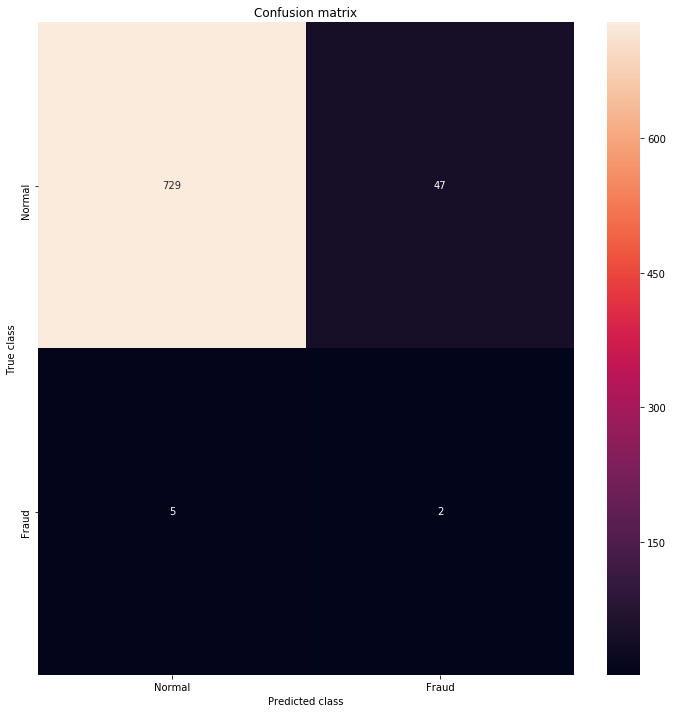

In [13]:
# As with autoencoders, it is the assumption that fraud or anomalies will suffer 
# from a detectably high reconstruction error, predicting class as 1 (Fraud)
# if reconstruction error is greater than threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
LABELS = ["Normal","Fraud"]
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [65]:
testlist = [2,4,6,3,5,7,9,10]
for i in range(len(testlist)-len(testlist),len(testlist),1):
    print(i)
    if testlist[i]
    

0
1
2
3
4
5
6
7


In [58]:
range(len(testlist)-4,5,2)

range(2, 5, 2)